In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [40]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [41]:
balance_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Predict_Heart_Disease/Datasets/Balanced_DATA_FINAL.csv')

In [42]:
balance_data.shape

(86881, 22)

In [43]:
balance_data.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,27.40,0.0,0.0,2.0,1.0,1.0,...,1.0,0.0,2.0,2.0,3.0,0.0,0.0,5.0,6.0,8.0
1,0.0,0.0,0.0,1.0,28.37,1.0,0.0,2.0,1.0,1.0,...,1.0,0.0,1.0,5.0,0.0,0.0,1.0,3.0,5.0,8.0
2,0.0,1.0,1.0,1.0,19.37,1.0,0.0,2.0,1.0,1.0,...,1.0,0.0,2.0,7.0,0.0,0.0,0.0,8.0,6.0,7.0
3,1.0,0.0,1.0,1.0,22.67,1.0,1.0,2.0,1.0,0.0,...,1.0,0.0,3.0,0.0,0.0,1.0,0.0,10.0,3.0,3.0
4,1.0,0.0,1.0,1.0,27.89,1.0,0.0,2.0,1.0,1.0,...,1.0,0.0,4.0,0.0,0.0,0.0,1.0,13.0,5.0,4.0


# **Feature & Target Separation**

In [44]:
# Check missing values
print(balance_data.isnull().sum())

# Check for any outliers or extreme values
print(balance_data.describe())

# Separate features and target
X = balance_data.drop('HeartDiseaseorAttack', axis=1)
y = balance_data['HeartDiseaseorAttack']

HeartDiseaseorAttack    0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
Diabetes                0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64
       HeartDiseaseorAttack        HighBP      HighChol     CholCheck  \
count          86881.000000  86881.000000  86881.000000  86881.000000   
mean               0.499753      0.416535      0.564888      0.974747   
std                0.500003      0.492987      0.495775      0.156893   
min                0.000000      0.000000      0.000000      0.000000   
25%                0.000000      0.000000      0.0

# **Train-Test Split (70% train, 30% test)**

In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)

# **Feature Scaling (Standardization)**

In [46]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# **Model Training**

In [47]:
# --- Initialize Models ---

# Logistic Regression: A linear model for binary classification.
# max_iter is increased to ensure the model converges, especially with scaled data.
logreg = LogisticRegression(max_iter=1000)

# Gaussian Naive Bayes: A probabilistic classifier based on Bayes' theorem with an assumption of normality.
nb = GaussianNB()

# AdaBoost Classifier: An ensemble method that combines multiple weak classifiers to build a strong one.
# It places more weight on instances that are difficult to classify.
# random_state=42: Ensures reproducibility.
# n_estimators=100: The maximum number of estimators at which boosting is terminated.
# learning_rate=1.0: Weight applied to each classifier at each boosting iteration.
ab_model = AdaBoostClassifier(
    random_state=42,
    n_estimators=100,
    learning_rate=1.0,
)

# XGBoost Classifier: An optimized and highly efficient implementation of gradient boosting.
# random_state=42: Ensures reproducibility.
# n_estimators=100: Number of boosting rounds.
# learning_rate=0.1: Step size shrinkage to prevent overfitting.
# max_depth=3: Maximum depth of a tree.
# use_label_encoder=False: Suppresses a deprecation warning by disabling automatic label encoding.
# eval_metric="logloss": Evaluation metric for validation data; logloss is common for binary classification.
xgb_model = xgb.XGBClassifier(
    random_state=42,
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    use_label_encoder=False,
    eval_metric="logloss",
)

# Random Forest Classifier: An ensemble model that fits multiple decision trees on various sub-samples of the dataset.
# It uses averaging to improve predictive accuracy and control over-fitting.
# random_state=42: Ensures reproducibility.
rfc = RandomForestClassifier(random_state=42)


# --- Fit Models ---

# Fit models that benefit from or require feature scaling.
# Logistic Regression and Naive Bayes are sensitive to the scale of the features.
logreg.fit(X_train_scaled, y_train)
nb.fit(X_train_scaled, y_train)

# Fit tree-based models. These models are generally not sensitive to the scale of the features.
# It's common practice to train them on the original (unscaled) data.

ab_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)

# Re-fitting Logistic Regression and Random Forest (Note: This is redundant as they were already fitted above).
# It's good practice to fit each model only once.
# logreg.fit(X_train_scaled, y_train) # This line is a duplicate
rfc.fit(X_train_scaled, y_train)      # Fitting Random Forest on scaled data is also a valid approach.

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [13:35:01] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


RandomForestClassifier(random_state=42)

# **Predictions**

In [48]:
y_pred_log = logreg.predict(X_test_scaled)

y_pred_nb = nb.predict(X_test_scaled)

y_pred_ab = ab_model.predict(X_test)
y_pred_xgb = xgb_model.predict(X_test)

y_pred_rfc = rfc.predict(X_test_scaled)   # Added Random Forest predictions



# **Model Evaluation** (Confusion Matrix, Accuracy, F1)



In [49]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
import pandas as pd

# Using the prediction variables from all your trained models
all_predictions = {
    "Logistic Regression": y_pred_log,
    "Naive Bayes": y_pred_nb,
    "Random Forest": y_pred_rfc,
    "AdaBoost": y_pred_ab,
    "XGBoost": y_pred_xgb
}

# --- Detailed Report for Each Model ---
# This loop will print the full report for every model.
# Note: Added average='weighted' to precision, recall, and f1_score.
# This is crucial for binary-class problems and gives a score weighted by the number of instances in each class.

print("="*60)
print("INDIVIDUAL MODEL PERFORMANCE REPORTS")
print("="*60)

for name, preds in all_predictions.items():
    print(f"\n--------------------- {name} ---------------------")
    # Note the use of :.4f to format the scores nicely
    print(f"Accuracy: {accuracy_score(y_test, preds):.4f}")
    print(f"Precision: {precision_score(y_test, preds, average='weighted'):.4f}")
    print(f"Recall: {recall_score(y_test, preds, average='weighted'):.4f}")
    print(f"F1 Score: {f1_score(y_test, preds, average='weighted'):.4f}")
    print("\nConfusion Matrix:\n", confusion_matrix(y_test, preds))
    # The classification report doesn't need the 'average' parameter as it reports per class.
    print("\nClassification Report:\n", classification_report(y_test, preds))


# --- Summary DataFrame for Easy Comparison (Recommended) ---
# This code creates a single, sorted table to easily see the best performing model.

summary_data = []
for name, preds in all_predictions.items():
    accuracy = accuracy_score(y_test, preds)
    precision = precision_score(y_test, preds, average='weighted')
    recall = recall_score(y_test, preds, average='weighted')
    f1 = f1_score(y_test, preds, average='weighted')
    summary_data.append({
        "Model": name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    })

summary_df = pd.DataFrame(summary_data).sort_values(by="Recall", ascending=False).reset_index(drop=True)

print("\n\n" + "="*60)
print("MODEL PERFORMANCE COMPARISON SUMMARY")
print("="*60)
display(summary_df)

INDIVIDUAL MODEL PERFORMANCE REPORTS

--------------------- Logistic Regression ---------------------
Accuracy: 0.7691
Precision: 0.7699
Recall: 0.7691
F1 Score: 0.7689

Confusion Matrix:
 [[ 9667  3372]
 [ 2647 10379]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.79      0.74      0.76     13039
         1.0       0.75      0.80      0.78     13026

    accuracy                           0.77     26065
   macro avg       0.77      0.77      0.77     26065
weighted avg       0.77      0.77      0.77     26065


--------------------- Naive Bayes ---------------------
Accuracy: 0.7292
Precision: 0.7297
Recall: 0.7292
F1 Score: 0.7291

Confusion Matrix:
 [[9821 3218]
 [3840 9186]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.72      0.75      0.74     13039
         1.0       0.74      0.71      0.72     13026

    accuracy                           0.73     26065
   macro avg  

,Model,Accuracy,Precision,Recall,F1 Score
0,XGBoost,0.770152,0.772916,0.770152,0.769576
1,Logistic Regression,0.769077,0.769919,0.769077,0.768902
2,AdaBoost,0.767389,0.767972,0.767389,0.767267
3,Random Forest,0.753539,0.755270,0.753539,0.753128
4,Naive Bayes,0.729215,0.729732,0.729215,0.729058


To decide the best model, compare these metrics across Logistic Regression, Naive Bayes, Random Forest, AdaBoost and XGBoost.
 - If minimizing false negatives is most important (high recall for the 'Heart Disease' class), look for the model with the highest recall for class 1.
 - If balancing precision and recall is key, compare the F1 scores.
 - If overall correctness is the main goal, compare the accuracy scores.

In this specific output, Logistic Regression has the highest Accuracy and F1 Score, suggesting it is the best performing model among the three for this dataset.

# **ROC Curves for All Models**

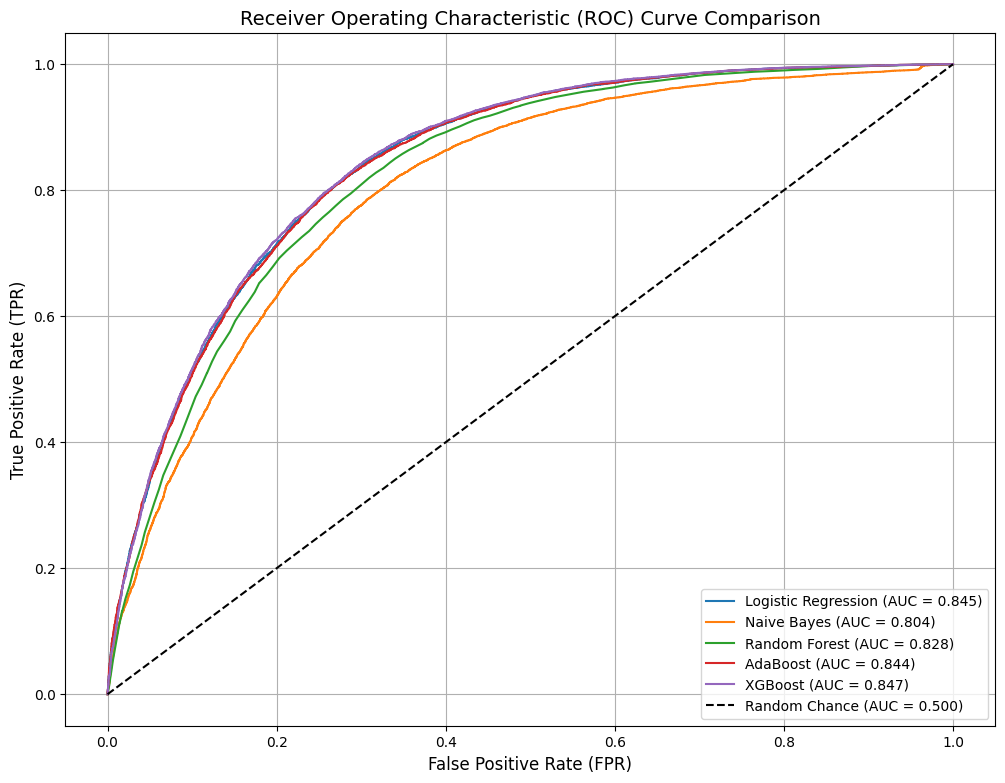

In [50]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# It's good practice to group your trained model objects for easy iteration
# Note: This relies on the models being trained already (as you've done)
# The SVC model must have been initialized with probability=True for this to work.

models_for_roc = {
    # Models trained on SCALED data
    "Logistic Regression": (logreg, X_test_scaled),
    "Naive Bayes": (nb, X_test_scaled),
    "Random Forest": (rfc, X_test_scaled),

    # Models trained on ORIGINAL data
    "AdaBoost": (ab_model, X_test),
    "XGBoost": (xgb_model, X_test)
}

# --- Plotting the ROC Curves ---
plt.figure(figsize=(12, 9))

# Loop through each model to calculate and plot its ROC curve
for name, (model, X_data) in models_for_roc.items():
    # Predict probabilities for the positive class
    # The [:, 1] selects the probabilities for the positive class (usually class '1')
    probs = model.predict_proba(X_data)[:, 1]

    # Calculate ROC curve and AUC score
    fpr, tpr, _ = roc_curve(y_test, probs)
    roc_auc = auc(fpr, tpr)

    # Plot the curve
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.3f})') # Using 3 decimal places for more detail

# --- Finalizing the Plot ---
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance (AUC = 0.500)') # Dashed line for random chance

plt.xlabel('False Positive Rate (FPR)', fontsize=12)
plt.ylabel('True Positive Rate (TPR)', fontsize=12)
plt.title('Receiver Operating Characteristic (ROC) Curve Comparison', fontsize=14)
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

The ROC curve is a graphical plot that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied. It plots the True Positive Rate (sensitivity) against the False Positive Rate (1-specificity) at various threshold settings.

In this context, the ROC curves for Logistic Regression, Naive Bayes, SVC, Random Forest, AdaBoost and XGBoost show how well each model is able to distinguish between individuals who have heart disease (True Positives) and those who do not (False Positives) across different classification thresholds. The Area Under the Curve (AUC) provides a single measure of overall performance, with a higher AUC indicating a better ability to discriminate between the two classes. A perfect classifier would have an AUC of 1, while a random classifier would have an AUC of 0.5.

# **Hyperparameter Tuning**

In [63]:
import xgboost as xgb

# XGBoost Parameter Grid
param_grid_xgb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Note: use_label_encoder and eval_metric are set to avoid deprecation warnings
grid_xgb = GridSearchCV(
    xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
    param_grid_xgb, cv=5, scoring='recall', n_jobs=-1
)
grid_xgb.fit(X_train, y_train) # Using original X_train

print("Best Parameters for XGBoost:", grid_xgb.best_params_)
print("Best CV Recall for XGBoost:", grid_xgb.best_score_)

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [17:11:01] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best Parameters for XGBoost: {'colsample_bytree': 1.0, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200, 'subsample': 1.0}
Best CV Recall for XGBoost: 0.8307838695738099


In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Logistic Regression Parameter Grid
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l2'],
    'solver': ['liblinear', 'lbfgs']
}

# Note: Using roc_auc for scoring
grid_lr = GridSearchCV(LogisticRegression(max_iter=1000, random_state=42), param_grid_lr, cv=5, scoring='recall', n_jobs=-1)
grid_lr.fit(X_train_scaled, y_train)

print("Best Parameters for Logistic Regression:", grid_lr.best_params_)
print("Best CV Recall for Logistic Regression:", grid_lr.best_score_)

Best Parameters for Logistic Regression: {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
Best CV Recall for Logistic Regression: 0.7953150416521395


In [65]:
import numpy as np
from sklearn.naive_bayes import GaussianNB

# Gaussian Naive Bayes Parameter Grid
# The parameter is the portion of the largest variance of all features that is added to variances for calculation stability.
param_grid_nb = {
    'var_smoothing': np.logspace(0, -9, num=100)
}

grid_nb = GridSearchCV(
    GaussianNB(),
    param_grid_nb,
    cv=5,
    scoring='recall',
    n_jobs=-1
)
grid_nb.fit(X_train_scaled, y_train) # Naive Bayes is sensitive to scale

print("Best Parameters for Gaussian Naive Bayes:", grid_nb.best_params_)
print("Best CV Recall for Gaussian Naive Bayes:", grid_nb.best_score_)

Best Parameters for Gaussian Naive Bayes: {'var_smoothing': np.float64(0.02848035868435802)}
Best CV Recall for Gaussian Naive Bayes: 0.7013791159625207


In [80]:
from sklearn.ensemble import AdaBoostClassifier

# AdaBoost Parameter Grid
param_grid_ab = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0]
    # The base_estimator is typically a DecisionTreeClassifier, which is the default.
}

grid_ab = GridSearchCV(
    AdaBoostClassifier(random_state=42),
    param_grid_ab,
    cv=5,
    scoring='recall',
    n_jobs=-1
)
grid_ab.fit(X_train, y_train) # Using original X_train

print("Best Parameters for AdaBoost:", grid_ab.best_params_)
print("Best CV Recall for AdaBoost:", grid_ab.best_score_)

Best Parameters for AdaBoost: {'learning_rate': 1.0, 'n_estimators': 200}
Best CV Recall for AdaBoost: 0.7692219515345149


In [55]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest Parameter Grid
param_grid_rfc = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

grid_rfc = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rfc, cv=5, scoring='recall', n_jobs=-1)
grid_rfc.fit(X_train, y_train) # Using original X_train

print("Best Parameters for Random Forest:", grid_rfc.best_params_)
print("Best CV Recall for Random Forest:", grid_rfc.best_score_)

/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best Parameters for Random Forest: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best CV ROC_AUC for Random Forest: 0.8470323766950418


# **Make Predictions with Best Tuned Models**

In [78]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# ===================================================================
# --- 1. Extract the Best Tuned Models from GridSearchCV ---
# ===================================================================
print("Extracting best estimators from each grid search...")

# Extract models that were tuned on SCALED data
best_lr  = grid_lr.best_estimator_
best_nb  = grid_nb.best_estimator_

# Extract models that were tuned on ORIGINAL data
best_rfc = grid_rfc.best_estimator_
best_ab  = grid_ab.best_estimator_
best_xgb = grid_xgb.best_estimator_

print("All best estimators have been extracted.")


# ===================================================================
# --- 2. Make Predictions with the Tuned Models ---
# ===================================================================
print("\nGenerating final predictions from all tuned models...")

# Generate predictions using the appropriate test set (scaled or original)
y_pred_lr_tuned  = best_lr.predict(X_test_scaled)
y_pred_nb_tuned  = best_nb.predict(X_test_scaled)

y_pred_rfc_tuned = best_rfc.predict(X_test)
y_pred_ab_tuned  = best_ab.predict(X_test)
y_pred_xgb_tuned = best_xgb.predict(X_test)

print("All final predictions have been generated.")




Extracting best estimators from each grid search...
All best estimators have been extracted.

Generating final predictions from all tuned models...
All final predictions have been generated.


# **Evaluate Each Tuned Model**

In [79]:
# ===================================================================
# --- 3. Final Evaluation: The Championship Round ---
# ===================================================================

# Dictionary containing the names and prediction results of our tuned models
tuned_predictions = {
    "Tuned Logistic Regression": y_pred_lr_tuned,
    "Tuned Naive Bayes": y_pred_nb_tuned,
    "Tuned Random Forest": y_pred_rfc_tuned,
    "Tuned AdaBoost": y_pred_ab_tuned,
    "Tuned XGBoost": y_pred_xgb_tuned
}

# Calculate performance metrics for each tuned model
final_performance_data = []
for name, y_pred in tuned_predictions.items():
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    final_performance_data.append({
        "Model": name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    })

# Create the final performance DataFrame
final_performance_df = pd.DataFrame(final_performance_data)

# Sort by the most important metric (e.g., Recall) to find the overall winner
final_performance_df = final_performance_df.sort_values(by="Recall", ascending=False).reset_index(drop=True)

print("\n\n" + "="*60)
print("FINAL TUNED MODEL PERFORMANCE ON TEST DATA")
print("="*60)
display(final_performance_df)



FINAL TUNED MODEL PERFORMANCE ON TEST DATA


,Model,Accuracy,Precision,Recall,F1 Score
0,Tuned Logistic Regression,0.769039,0.769869,0.769039,0.768866
1,Tuned Random Forest,0.768348,0.771867,0.768348,0.767606
2,Tuned XGBoost,0.763054,0.768820,0.763054,0.761789
3,Tuned Naive Bayes,0.728985,0.729512,0.728985,0.728825
4,Tuned AdaBoost,0.722617,0.745782,0.722617,0.715956


**Model Comparison Summary**

** **bold text**Random Forest** performs best overall, especially in terms of:

 - Accuracy

 - Recall (minimizing false negatives)

 - F1 Score (balance between precision and recall)

In [81]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(best_rfc, X_train_scaled, y_train, cv=5, scoring='recall')

print(f"Cross-validation recall scores for XGBoost: {cv_scores}")
print(f"Mean cross-validation recall: {cv_scores.mean():.4f}")
print(f"Standard deviation of cross-validation recall: {cv_scores.std():.4f}")

Cross-validation recall scores for XGBoost: [0.8223392  0.82296808 0.8283975  0.81460767 0.81888468]
Mean cross-validation recall: 0.8214
Standard deviation of cross-validation recall: 0.0046


# **Plot ROC Curves for Tuned Models**

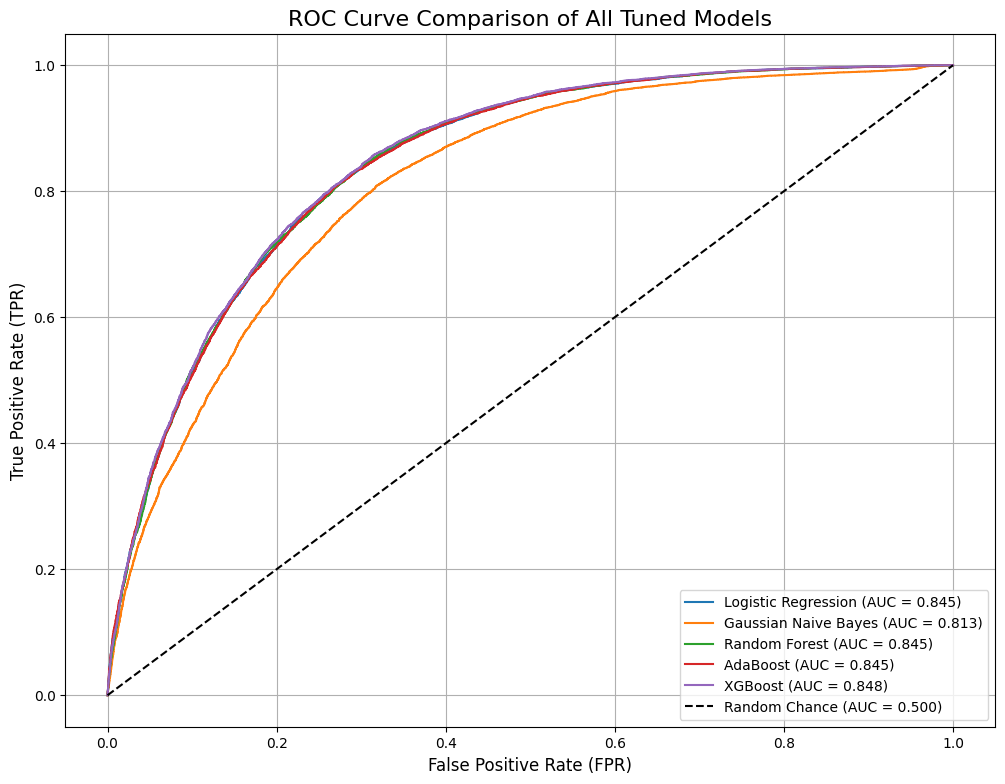

In [59]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# --- 1. Group All Best-Tuned Models ---
# This dictionary pairs the model's name with the model object and the correct test data.

tuned_models_for_roc = {
    # Models that require SCALED data
    "Logistic Regression": (best_lr, X_test_scaled),
    "Gaussian Naive Bayes": (best_nb, X_test_scaled),

    # Models that use ORIGINAL data (Tree-based)
    "Random Forest": (best_rfc, X_test),
    "AdaBoost": (best_ab, X_test),
    "XGBoost": (best_xgb, X_test)
}

# --- 2. Create the Plot ---
plt.figure(figsize=(12, 9))

# Loop through each model in the dictionary
for name, (model, X_data) in tuned_models_for_roc.items():
    # Predict probabilities for the positive class (class '1')
    y_prob = model.predict_proba(X_data)[:, 1]

    # Calculate ROC curve and Area Under the Curve (AUC)
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    # Add the ROC curve for this model to the plot
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.3f})')

# --- 3. Finalize and Show the Plot ---
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance (AUC = 0.500)') # Dashed line for random guess
plt.title('ROC Curve Comparison of All Tuned Models', fontsize=16)
plt.xlabel('False Positive Rate (FPR)', fontsize=12)
plt.ylabel('True Positive Rate (TPR)', fontsize=12)
plt.legend(loc='lower right')
plt.grid(True)
plt.savefig('/content/drive/MyDrive/Colab Notebooks/Predict_Heart_Disease/Images/roc_curve_comparison_tuned.png', dpi=300, bbox_inches='tight')
plt.show()

**Gradient Boosting, Random Forest and XGBoost** are the best models in terms of distinguishing between heart disease patients and non-patients.

All these models are significantly better than others.

# **Feature Selection**

Feature Ranking from RFE with Random Forest:
              Feature  Ranking  Selected
0              HighBP        1      True
1            HighChol        1      True
3                 BMI        1      True
14           MentHlth        1      True
15           PhysHlth        1      True
13            GenHlth        1      True
18                Age        1      True
16           DiffWalk        1      True
20             Income        1      True
19          Education        1      True
17                Sex        2     False
5              Stroke        3     False
8              Fruits        4     False
4              Smoker        5     False
7        PhysActivity        6     False
9             Veggies        7     False
12        NoDocbcCost        8     False
10  HvyAlcoholConsump        9     False
11      AnyHealthcare       10     False
6            Diabetes       11     False
2           CholCheck       12     False


/tmp/ipython-input-1838837361.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Ranking', y='Feature', data=top_rfe_features, palette='viridis')


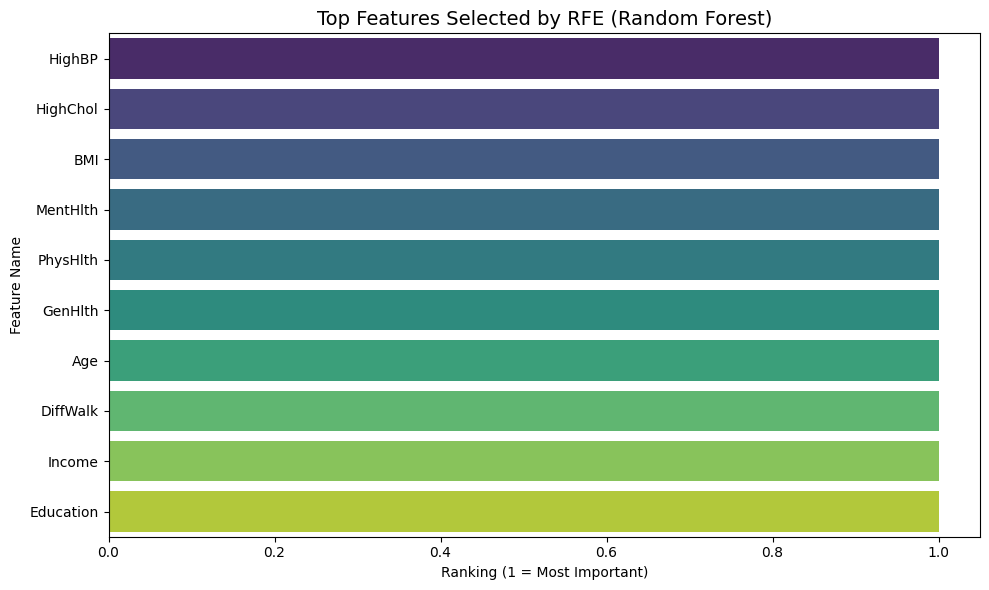

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# --- Prepare your data ---
X = balance_data.drop('HeartDiseaseorAttack', axis=1)
y = balance_data['HeartDiseaseorAttack']

# We create a RandomForestClassifier to use as the importance-judging engine.
# n_jobs=-1 uses all available CPU cores to speed up the process.
rfc = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

# We simply pass our new 'rfc' object to the RFE constructor.
rfe = RFE(estimator=rfc, n_features_to_select=10)
rfe.fit(X, y)

# --- Store and display the ranking ---
rfe_ranking = pd.DataFrame({
    'Feature': X.columns,
    'Ranking': rfe.ranking_,
    'Selected': rfe.support_
}).sort_values(by='Ranking')

print("Feature Ranking from RFE with Random Forest:")
print(rfe_ranking)

# --- Plot the results ---
top_rfe_features = rfe_ranking[rfe_ranking['Selected'] == True]

plt.figure(figsize=(10, 6))
sns.barplot(x='Ranking', y='Feature', data=top_rfe_features, palette='viridis')
plt.title('Top Features Selected by RFE (Random Forest)', fontsize=14)
plt.xlabel('Ranking (1 = Most Important)')
plt.ylabel('Feature Name')
plt.tight_layout()
plt.show()



---



In [61]:
import pickle
import os

# --- Define Models and File Paths ---

# Create a dictionary to hold your best-tuned models and their desired filenames.
# This makes the saving process clean and scalable.
models_to_save = {
    'LogisticRegression': grid_lr.best_estimator_,
    'GaussianNB': grid_nb.best_estimator_,
    'AdaBoost': grid_ab.best_estimator_,
    'XGBoost': grid_xgb.best_estimator_,
    'RandomForest':grid_rfc.best_estimator_
}

# Define the base directory where all models will be saved in your Google Drive.
base_save_path = '/content/drive/MyDrive/Colab Notebooks/Predict_Heart_Disease/Models'

# Ensure the directory exists. If not, create it.
os.makedirs(base_save_path, exist_ok=True)


# --- Loop and Save Each Model ---

print("Starting to save all tuned models...")

# Iterate through each model in the dictionary.
for model_name, model_object in models_to_save.items():
    # Create a full path for the current model's pickle file.
    # Example: /content/drive/MyDrive/.../Models/final_model_RandomForest.pkl
    file_path = os.path.join(base_save_path, f'{model_name}.pkl')

    try:
        # Open the file in write-binary ('wb') mode and save the model.
        with open(file_path, 'wb') as f:
            pickle.dump(model_object, f)

        # Print a success message for each model.
        print(f"✅ Model '{model_name}' saved successfully to: {file_path}")

    except Exception as e:
        # If any error occurs during saving, print an error message.
        print(f"❌ Error saving model '{model_name}': {e}")

print("\nAll models have been processed.")

Starting to save all tuned models...
✅ Model 'LogisticRegression' saved successfully to: /content/drive/MyDrive/Colab Notebooks/Predict_Heart_Disease/Models/LogisticRegression.pkl
✅ Model 'GaussianNB' saved successfully to: /content/drive/MyDrive/Colab Notebooks/Predict_Heart_Disease/Models/GaussianNB.pkl
✅ Model 'AdaBoost' saved successfully to: /content/drive/MyDrive/Colab Notebooks/Predict_Heart_Disease/Models/AdaBoost.pkl
✅ Model 'XGBoost' saved successfully to: /content/drive/MyDrive/Colab Notebooks/Predict_Heart_Disease/Models/XGBoost.pkl
✅ Model 'RandomForest' saved successfully to: /content/drive/MyDrive/Colab Notebooks/Predict_Heart_Disease/Models/RandomForest.pkl

All models have been processed.
